# Problem Statement

Predict whether a patient has a heart disease or not, given clinical parameters?

# Dataset

The problem statement is dervied from Kaggle https://www.kaggle.com/ronitf/heart-disease-uci

# Features

Following are the features described in the dataset

1. age : age in years
2. sex : 1 for male and 0 for female
3. cp : Chest pain type
        0 - Typical angina (Chest pain related decrease blood supply to the heart)
        1 - Atypical angina (Chest pain not related to heart)
        2 - Non-anginal pain (Typically esophageal spasms non heart related)
        3 - Asymptomatic (Chest pain not showing signs of disease)
4. trestbps : resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol : serum cholestoral in mg/dl
    serum = LDL + HDL + .2 * triglycerides
    above 200 is cause for concern
6. fbs : If fasting blood sugar > 120 mg/dl, 1 = true and 0 = false 
    Value '>126' mg/dL signals diabetes
7. restecg : resting electrocardiographic results
    0 - Nothing to note
    1 - ST-T Wave abnormality, can range from mild symptoms to severe problems, signals non-normal heart beat
    2 - Possible or definite left ventricular hypertrophy. Enlarged heart's main pumping chamber
8. thalach : Maximum heart rate achieved
9. exang : Exercise induced angina (1 = yes; 0 = no)
10. oldpeak : ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope : the slope of the peak exercise ST segment
    0 (Upsloping) : better heart rate with excercise (uncommon)
    1 (Flatsloping) : minimal change (typical healthy heart)
    2 (Downsloping): signs of unhealthy heart
12. ca : number of major vessels (0-3) colored by flourosopy
    Colored vessel means the doctor can see the blood passing through the more blood movement the better (no clots)
13. thal : thalium stress result
    1,3 - normal
    6 - fixed defect, used to be defect but ok now
    7 - reversable defect, no proper blood movement when excercising
14. target : have disease or not (1=yes, 0=no) (= the predicted attribute)

# Data Analysis and Exploration

In [2]:
# Import basic modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot in the notebook
%matplotlib inline 

In [3]:
# Import scikit module for training and evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [5]:
# Loading Data
df = pd.read_csv("heart.csv")

In [7]:
df.shape

(303, 14)

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
# Check the target class
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

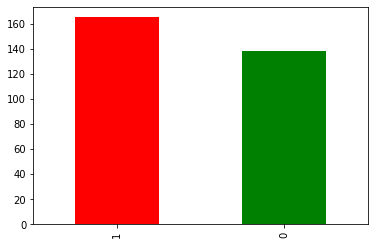

In [16]:
# We have 165 for yes, 138 for no, let's plot the target class count
df["target"].value_counts().plot(kind="bar", color=["red", "green"]);

In [17]:
# Let's check if we have any missing values in the dataset
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Heart Disease frequency with respect to Sex

In [18]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [24]:
# Comparing target class with sex column
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


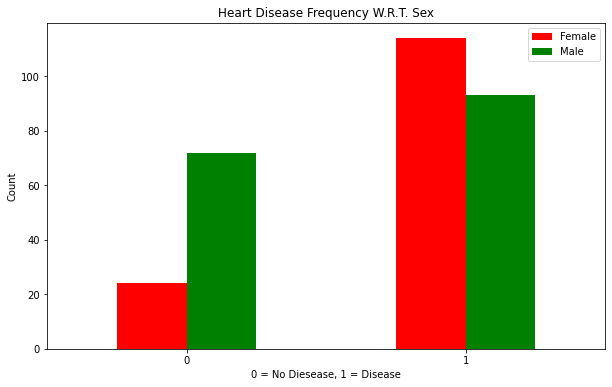

In [25]:
# Create a plot of crosstab for this
pd.crosstab(df.sex, df.target).plot(kind="bar", figsize=(10, 6), color=["red", "green"])

plt.title("Heart Disease Frequency W.R.T. Sex")
plt.xlabel("0 = No Diesease, 1 = Disease")
plt.ylabel("Count")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

## Heart Disease Frequency w.r.t. Chest Pain Type

In [23]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


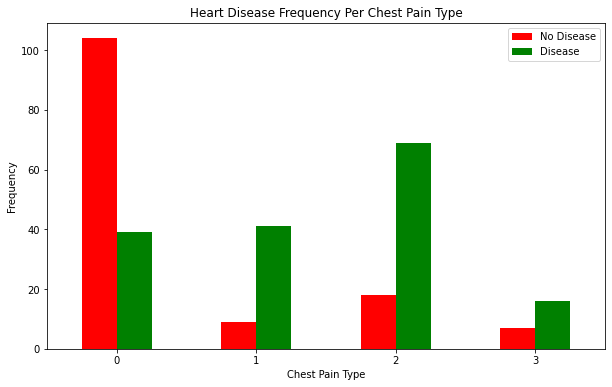

In [26]:
# Create a plot of crosstab to make it more visual
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(10, 6), color=["red", "green"])

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

## Heart Disease Frequeny w.r.t. Age

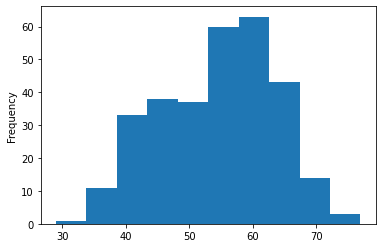

In [27]:
df.age.plot.hist();

## Check Age vs Max Heart Rate parameters through a scatter plot

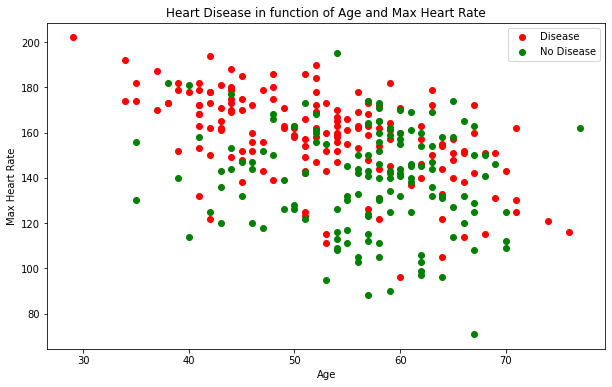

In [28]:
plt.figure(figsize=(10, 6))

# Positive samples
plt.scatter(df.age[df.target==1], df.thalach[df.target==1], c="red")

# Negative samples
plt.scatter(df.age[df.target==0], df.thalach[df.target==0], c="green")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

## Check correlation between features

In [29]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.5, -0.5)

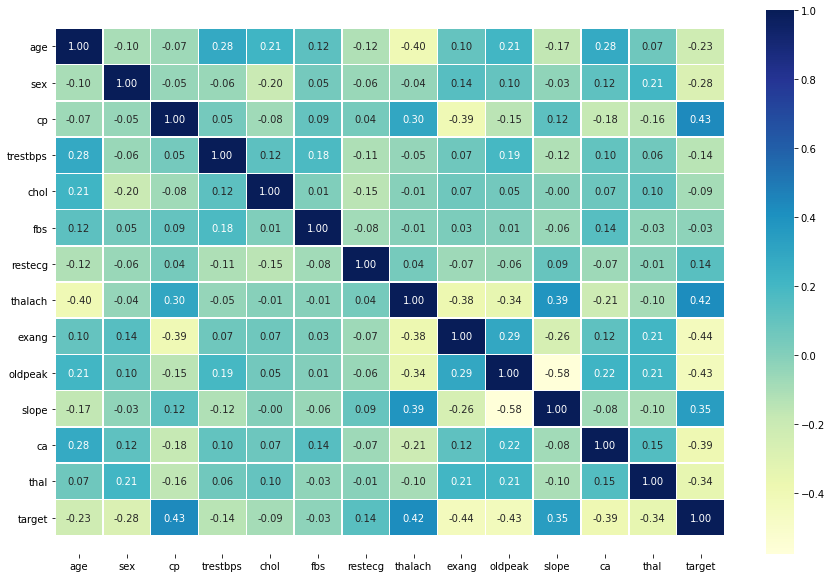

In [30]:
# Let's plot the correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Modelling

In [31]:
# Split data into X and y
X = df.drop("target", axis=1)
y = df["target"]

In [32]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [33]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [34]:
# Split data into train test sets in 80:20 ratio
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [36]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

In [37]:
len(X_train)

242

We will train our model using 3 different models
    1. Logistic Regression
    2. K-Nearest Neighbours Classifier
    3. Random Forest Classifier

In [38]:
# Create a function for fitting model and score
def modelling_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models
    Args :
        models : a dict of differetn Scikit-Learn machine learning models
        X_train : training data (no labels)
        X_test : testing data (no labels)
        y_train : training labels
        y_test : test labels
    Returns :
        model_scores : model score for the given models
    '''
    # Set random seed
    np.random.seed(42)
    
    model_scores = {}
    
    # Loop through all the given models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [40]:
# Create a model dictionary
models = {"Logistic Regression": LogisticRegression(),
          "K-Nearest Neighbors": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

In [42]:
model_scores = modelling_and_score(models=models, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test)

model_scores

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'Logistic Regression': 0.8852459016393442,
 'K-Nearest Neighbors': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

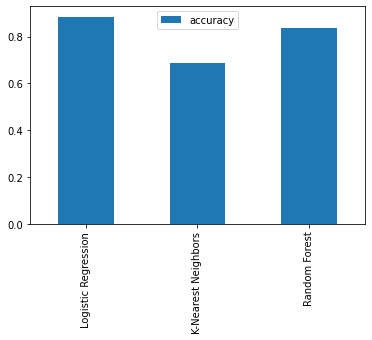

In [43]:
# Model Comparison
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

# Hyper-parameter Tuning of KNN

In [44]:
train_scores = []
test_scores = []

# Create a range of values for n_neighbors
neighbors = range(1, 21)

knn = KNeighborsClassifier()

for n in neighbors:
    knn.set_params(n_neighbors=n)

    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [45]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [46]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


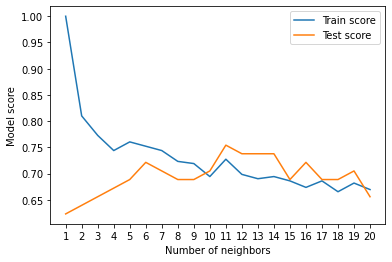

In [49]:
# Plot the scores
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

## Hyperparameter Tuning with RandomizedSearchCV

In [63]:
# Create a hyperparameter grid for LogisticRegression
logistic_regression_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}

In [68]:
# Create a hyperparameter grid for RandomForestClassifier
randomforest_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [65]:
# Let's tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_logistic_regression = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=logistic_regression_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_logistic_regression.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [66]:
rs_logistic_regression.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [67]:
rs_logistic_regression.score(X_test, y_test)

0.8852459016393442

In [69]:
# Let's tune RandomForestClassifier

# Setup random hyperparameter search for RandomForestClassifier
rs_randomforest_classifier = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=randomforest_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model for RandomForestClassifier()
rs_randomforest_classifier.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.9min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [70]:
# Find the best hyperparameters
rs_randomforest_classifier.best_params_

{'n_estimators': 360,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': 5}

In [71]:
rs_randomforest_classifier.score(X_test, y_test)

0.8688524590163934

## Hyperparameter Tuning with GridSearchCV

In [62]:
# Hyperparameters for LogisticRegression
logistic_regression_grid = {"C": np.logspace(-4, 4, 30), "solver": ["liblinear"]}

In [72]:
# Setup grid hyperparameter search for LogisticRegression
gs_logistic_regression = GridSearchCV(LogisticRegression(),
                          param_grid=logistic_regression_grid,
                          cv=5,
                          verbose=True)

In [73]:
# Fit grid hyperparameter search model
gs_logistic_regression.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


In [75]:
# Check the best hyperparmaters
gs_logistic_regression.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [76]:
# Evaluate the model
gs_logistic_regression.score(X_test, y_test)

0.8852459016393442

# Evaluating Tuned Model

In [78]:
y_preds = gs_logistic_regression.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [79]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

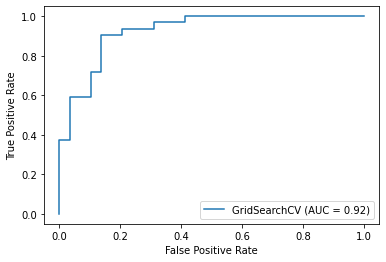

In [81]:
# Plot ROC Curve
plot_roc_curve(gs_logistic_regression, X_test, y_test)

In [82]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


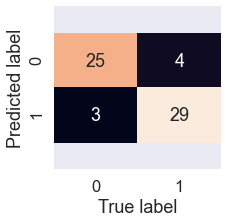

In [83]:
# Plot confusion matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    '''
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    '''
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), annot=True, cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)

In [84]:
# Let's cross-validate with precision, recall and f1 score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



# Evaluation Matrix Using Cross-validation

In [85]:
# Check the best parameters
gs_logistic_regression.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [88]:
# Create a classifier using the best parameters
best_clf = LogisticRegression(C = 0.23357214690901212, solver = "liblinear")

## Accuracy

In [89]:
# Check accuracy of cross validation
cv_accuracy = cross_val_score(best_clf, X, y, cv = 5, scoring = 'accuracy')
cv_accuracy

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [90]:
# Mean accuracy
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8479781420765027

## Precision

In [91]:
# Cross-validation precision
cv_precision = cross_val_score(best_clf, X, y, scoring = "precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

## Recall

In [92]:
# Cross-validation recall
cv_recall = cross_val_score(best_clf, X, y, scoring = "recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

## F1-Score

In [93]:
# Cross-validation F1-Score
cv_f1 = cross_val_score(best_clf, X, y, scoring = "f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

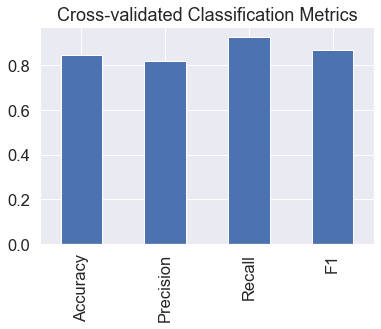

In [94]:
# Visualize cross-validation metrices
cv_metrics = pd.DataFrame({"Accuracy": cv_accuracy,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])

cv_metrics.T.plot.bar(title="Cross-validated Classification Metrics", legend=False);

# Feature Importance

To check which feature contributed most to our model

In [95]:
best_clf = LogisticRegression(C = 0.23357214690901212, solver = "liblinear")

best_clf.fit(X_train, y_train);

In [96]:
# Print coefficients
best_clf.coef_

array([[ 0.00369922, -0.90424098,  0.67472823, -0.0116134 , -0.00170364,
         0.04787687,  0.33490208,  0.02472938, -0.63120414, -0.57590996,
         0.47095166, -0.65165344, -0.69984217]])

In [97]:
# Match coefficients of features to columns of dataframe
feature_dict = dict(zip(df.columns, list(best_clf.coef_[0])))
feature_dict

{'age': 0.003699223396114675,
 'sex': -0.9042409779785583,
 'cp': 0.6747282348693419,
 'trestbps': -0.011613398123390507,
 'chol': -0.0017036431858934173,
 'fbs': 0.0478768694057663,
 'restecg': 0.33490207838133623,
 'thalach': 0.024729380915946855,
 'exang': -0.6312041363430085,
 'oldpeak': -0.5759099636629296,
 'slope': 0.47095166489539353,
 'ca': -0.6516534354909507,
 'thal': -0.6998421698316164}

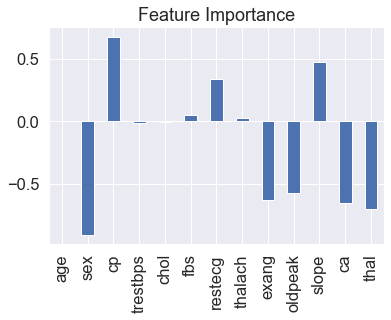

In [98]:
# Let's visualize the importance of features

feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = "Feature Importance", legend = False);

In [102]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107
